# Выявление определяющих успешность игры закономерности

В исследовании используются данные из открытых источников. Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Перед нами данные до 2016 года.

Нам нужно выявить определяющие успешность игры закономерности. 
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Цель исследования:
Выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv(open('/Users/timurbedilov/Downloads/games.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [4]:
display(df.head(25))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
display(df.tail(25))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16690,Pony Friends 2,PC,2009.0,Simulation,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.0,80.0,7.6,M
16693,PGA European Tour,N64,2000.0,Sports,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16694,Carmageddon 64,N64,1999.0,Action,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.0,67.0,tbd,E
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.0,61.0,5.8,T
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.0,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.0,48.0,tbd,E
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В датафрейме представлены игры начиная с 1980 по 2016 года. Так же, что в столбце critic_score оценки выставлены по 100-бальной шкале. Из-за того, что оценки пользователей представлены как объект, они не показаны. Посмотрим что с ними.

In [7]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Оценки пользователей от 0 до 10 с остатком до десятых.
Проблема связана с 'tbd'. Во время подготовки данных решим эту проблему и переведем к числовому значению.

Посмотрим что у нас с платформами, что бы определить нужно ли что-то делать с этим столбцом.

In [8]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Всё приведено к общему виду и повторяющихся платформ с разным написанием нет - это отлично.

В столбце name и genre по 2 пропущенных значения. Посмотрим на них.

In [9]:
df[df['Name'].isnull() == True]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это одни и те же строки. Как видим, что информация об этих играх нет, платформа не актуальна, а продажи не так высоки чтобы повлиять на ход исследования. Так что от неё в будущем можно избавиться. 


Теперь взглянем, что за значения лежат в столбце rating.

In [10]:
df['Rating'].value_counts()

Rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

#### После ознакомления с таблицей можно сделать следующие вывод:
- в датасете есть пропуски, больше всего в оценках критиков, пользователей, а так же в возрастном рейтинге ESRB. Первые маркеры оценок ESRB появились в 1996 году и были предназначены для рынков США и Канады. Похоже игры без этого рейтинга выходили раньше 96 года или не выходили на эти рынки официально. Еще это могут быть онлайн игры, к которым рейтинг не присваивается, а делается пометка. Пропуски в оценках могут быть связаны с отсутствием их на платформе по типу Метакритик, откуда тянуться оценки. Проверил пару игр на метакритике и их там не оказалось так, что теория не лишина смысла. На это же намекает отметка tbd (будет определено позже), которая используется на метакритике.
- в столбце rating лежат оценки организации ESRB.
- в стобце user_score оценки распределены по 10-ти бальной шкале.
- в столбце critic_score оценки распределены по 100-бальной шкале.
- нам следует привести в порядок столбец user_score, т.к. тип данных object, хотя там содержатся числовые значения об оценках. Как видим, что в конце таблицы нам попадается аббревиатура 'tbd', что означает: "будет определено позже". Собственно, из-за этой аббревиатуры у нас и поехал тип данных. В следующем шаге избавимся от этой аббревиатуры, чтобы привести столбец к нужному типу данных для дальнейшего исследования.
- видим, что в столбце year_of_release тип данных не целочисленный, хотя речь идёт о годах. дальше это исправим. Так же там большое колличество пропущенных значений. Что с ними делать решим в дальнейшем.
- в столбце name и genre пропущенные значения. Ознакомились с ними отдельно и пришли к выводу, что данную строку можно удалить, т.к. никакой информации она не несёт и восстановить так же ничего не выйдет.

## Подготовка данных к анализу.

Для удобства приведём название столбцов к нижнему регистру.

In [11]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Обработаем пустые значения. Начнем с удаления двух строк с пустыми значениями имени и жанра. Так же поступим и с годами. Данных не так много и ими проще пренебречь.

In [12]:
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['year_of_release'], inplace=True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

С годами, названием и жанром разобрались. Теперь решим вопрос с переводом пользовательского рейтинга к float, но для этого нужно разобраться с 'tbd'. Простым способом будет сделать 'tbd' пропуском потому, что по факту так и есть.

In [13]:
df['user_score'] = df['user_score'].replace('tbd', None)
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Столбец user_score приведен к правильному виду. Пропуски в остальных столбцах лучше не трогать. Мы не сможем их заменить адекватно, чтобы это не повлияло на результаты исследования.

Заполним пропуски в рейтинге, что бы можно было сравнивать дополнительно игры не получившие рейтинг.

In [14]:
df['rating'] = df['rating'].fillna('Без рейтинга')

Приведем года к int-у.

In [15]:
df['year_of_release'] = df['year_of_release'].astype(int)

Теперь создадим столбец с суммарными продажами во всех регионах.

In [16]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [17]:
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Без рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Без рейтинга,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Без рейтинга,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Без рейтинга,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Без рейтинга,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Без рейтинга,0.01


###### Вывод
Пропуски обработаны, по возможности заменены, данные по-максимуму сохранены. Типы данных столбцов изменили для удобства и работы с датафреймом.

## Исследовательский анализ данных

Сколько игр выпускалось в разные годы.

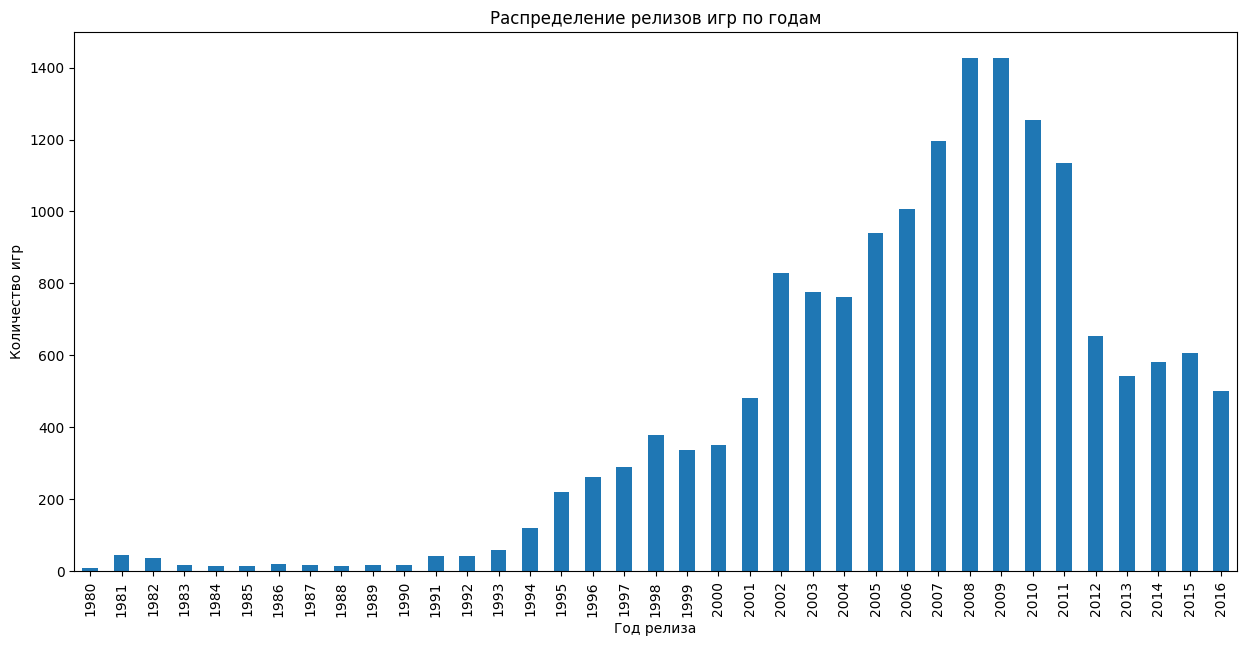

In [18]:
df.groupby('year_of_release')['name'].count().plot(kind = 'bar', figsize = (15, 7))

plt.title('Распределение релизов игр по годам')
plt.xlabel('Год релиза') 
plt.ylabel('Количество игр')
plt.show()

Видим резкий взлёт индустрии в начале 2000-х, в это время как раз вышла самая продаваемая консоль - PS2, а затем такой же резкий спад 2012. Пик пришелся на 2008-09 года, возможно в это время вышли все долгострои на актуальное поколение консолей (как раз прошло несколько лет с их выхода), после которых началось падение. В 2013 году вышли консоли нового поколения и произошел спад. На старые консоли уже не выпускали игры, а на новые еще не успели создать.

Посмотрим как менялись продажи по платформам.

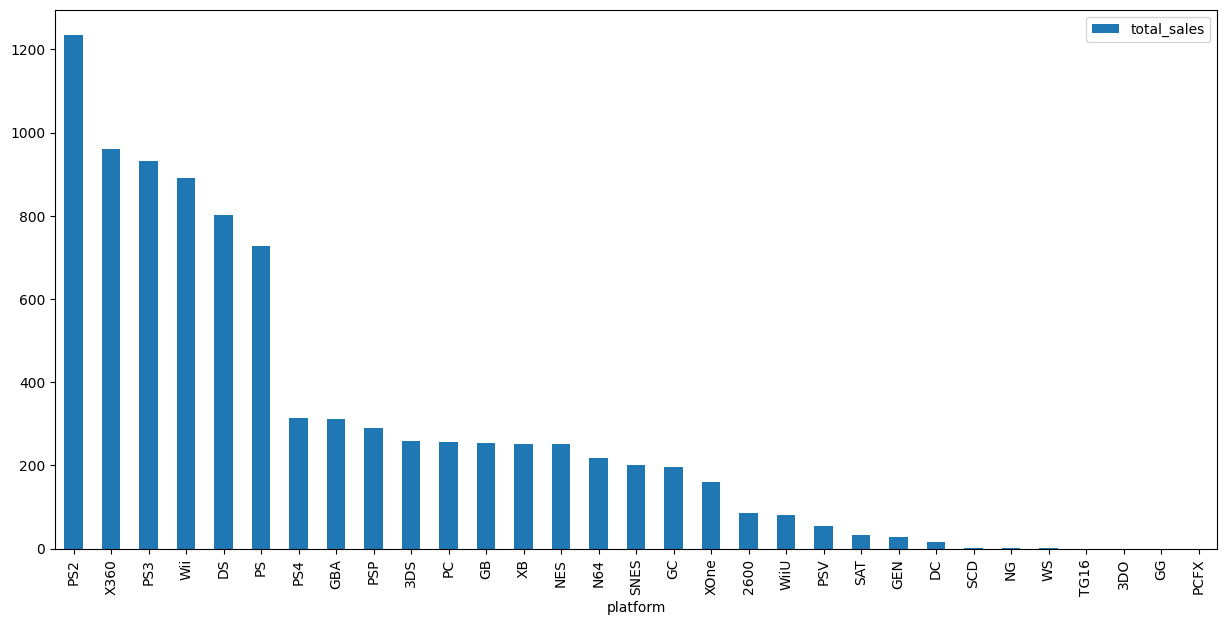

In [19]:
df.groupby('platform').agg({'total_sales':'sum'})\
    .sort_values(by='total_sales', ascending=False)\
    .plot(kind='bar', figsize=(15,7));

Как и предполагалось для самой продаваемой консоли продалось больше всего игр.

Выберем 8 самых популярных платформ с наибольшими суммарными продажами и постройте распределение по годам. 

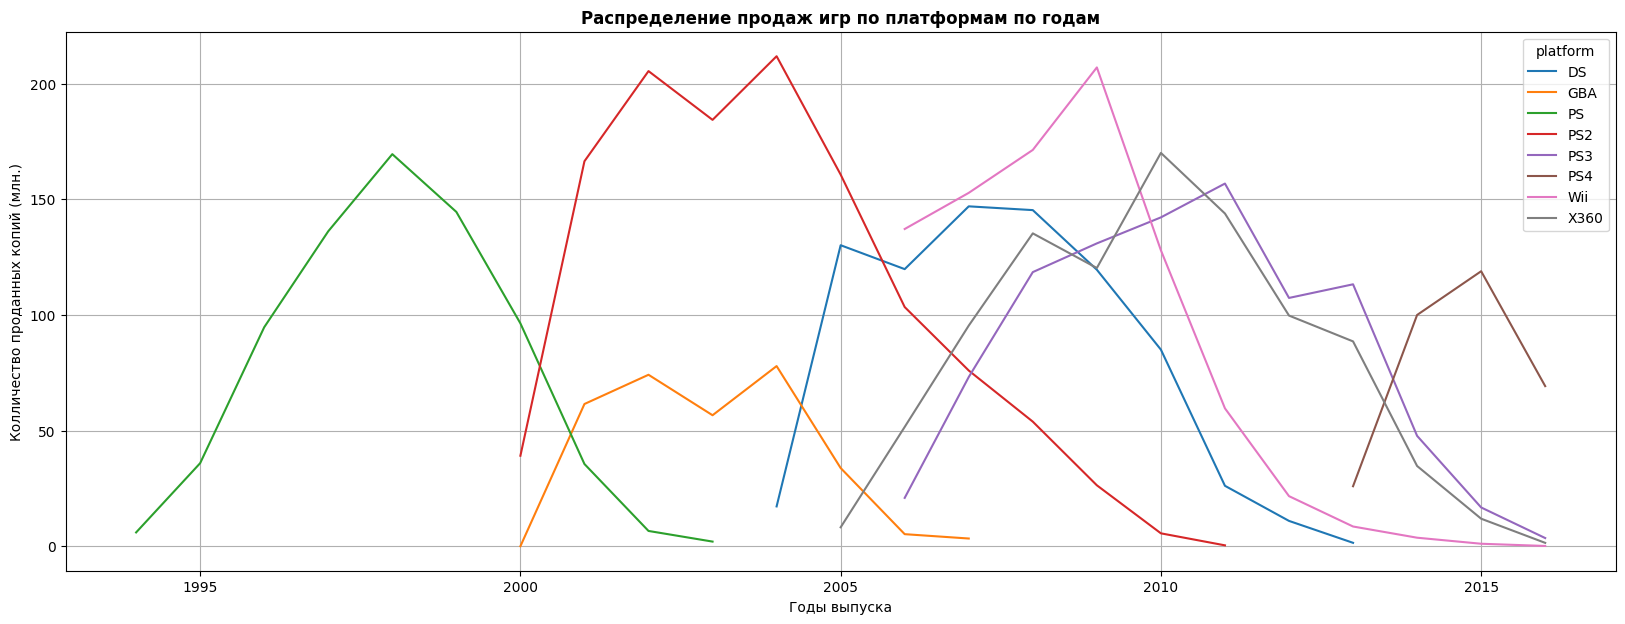

In [20]:
test_top = (df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').reset_index()
                .sort_values(by = 'total_sales', ascending = False).head(8))['platform']

(df
    .query('platform in @test_top and year_of_release > 1990')
    .pivot_table(index=['year_of_release'], columns='platform', values=['total_sales'], aggfunc='sum')
    .reset_index()
    .plot(x='year_of_release', y='total_sales', kind='line', grid=True, figsize=(20, 7))
)

plt.title('Распределение продаж игр по платформам по годам', fontweight="bold")
plt.xlabel('Годы выпуска')
plt.ylabel('Колличество проданных копий (млн.)')
plt.show()

Как видим, что в среднем каждая платформа живёт около 10 лет и пик продаж в среднем приходится на 3-й - 4-й года с момента выпуска консоли. 

**Вывод: актуальными считаем данные, начиная с 2012 года.**

In [21]:
df_2012 = df[df['year_of_release'] >= 2012]

In [22]:
df_new = df_2012.groupby(['year_of_release', 'platform'], as_index=False)\
    .agg({'total_sales':'sum'})\
    .sort_values(by='year_of_release')

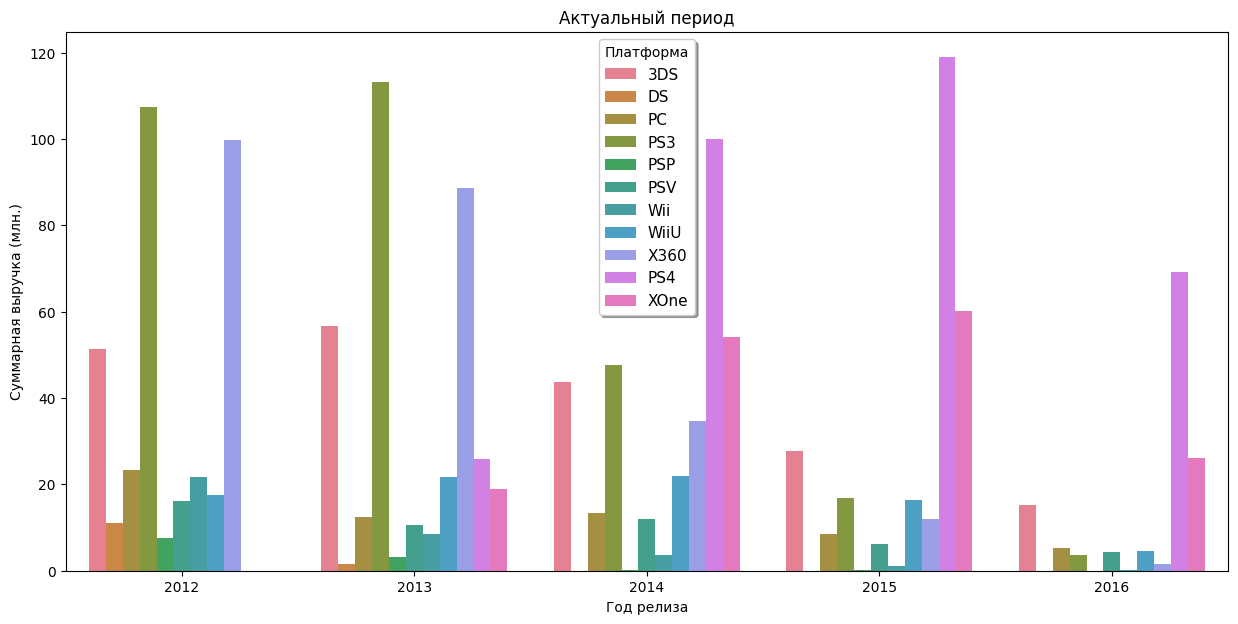

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(ax=ax, x = "year_of_release", y = "total_sales", hue = "platform", data = df_new)
plt.xlabel('Год релиза')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.legend(fontsize=11, shadow=True, title='Платформа')
plt.show()

Брать 16 год считаю не целесообразным из-за того, что он не полный. 
В 15 году самыми прибыльными платформами были PS4 и Xbox One. Это не удивительно так, как они вышли в 13 году и только выходят на свой пик. Так же с учетом ААА долгостроев, самые высокобюджетные игры для этих платформ выйдут через 4-5 лет после выхода консоли. Это как раз нужный нам 17 год.

**Следовательно, PS4 и "Xbox One" будем считать потенциально прибыльными и перспективными как минимум на ближайшие 2 года.**

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

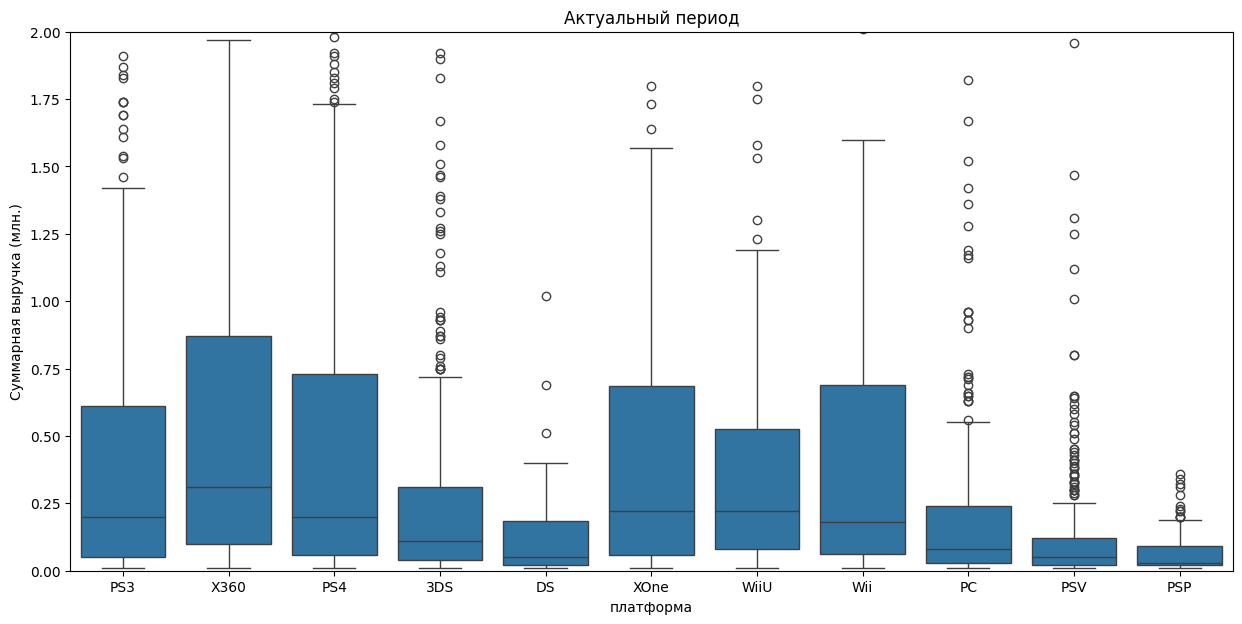

In [24]:
plt.figure(figsize=(15,7))
sns.boxplot(x='platform', y='total_sales', data=df_2012)
plt.xlabel('платформа')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 2]);

"Ящик с усами" для продаж игр на разных платформах с 2012 года подтвердил предыдущий вывод о топ-5.

Для проверки влияния отзывов пользователей и критиков на продажи внутри платформы возьмём для примера платформу, которая выходит на свой пик и на которую делаем ставки на будующее - PS4.

In [25]:
def game_evaluation(df, score, main_title, title='Оценки'):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df,  x=score, y='total_sales')
    plt.title(f'Распределение зависимости продаж от  {main_title}', size=15)
    plt.xlabel(title, size=13)
    plt.ylabel('Продажи', size=13)
    plt.show();

In [26]:
score_ps4 = df_2012[df_2012['platform'] == "PS4"]
score_ps4 = score_ps4[score_ps4['user_score'].isnull() == False] 
score_ps4 = score_ps4[score_ps4['critic_score'].isnull() == False]
score_ps4 = score_ps4[['user_score', 'critic_score', 'total_sales']]

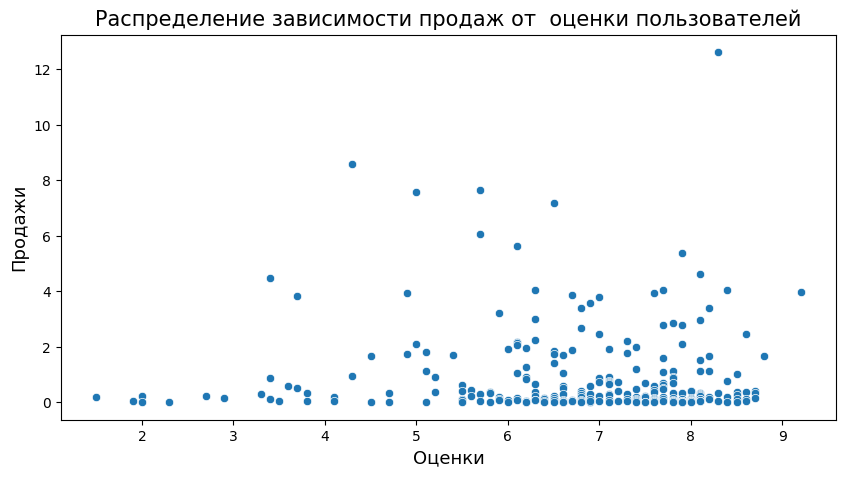

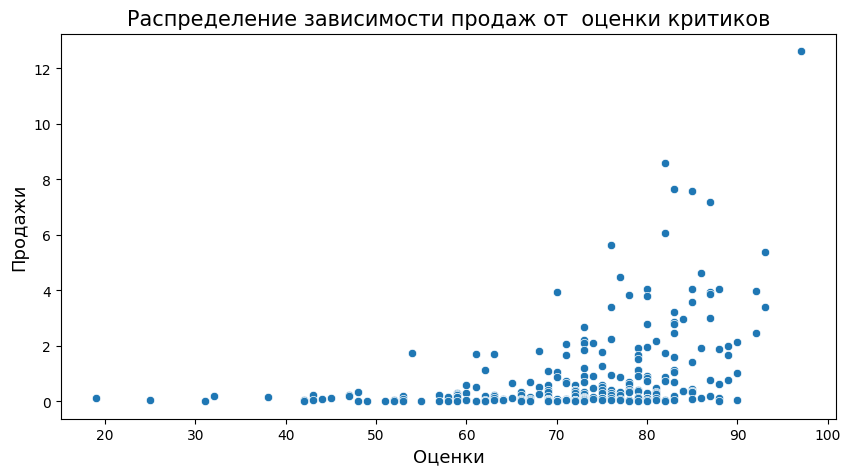

In [27]:
game_evaluation(score_ps4, 'user_score', 'оценки пользователей')

game_evaluation(score_ps4, 'critic_score', 'оценки критиков')

In [28]:
score_ps4.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.033625
critic_score,0.557654,1.000000,0.405895
total_sales,-0.033625,0.405895,1.000000


Мы видим, что оценки пользователей абсолютно никак не влияют на продажи игр. В то же время видно, что всё-таки оценки критиков имеют небольшой вес. Особенно это заметно на высоких оценках. Чем выше оценка, тем больше продажи. Коэффициент корреляция этого не показывает из-за того, что игр с хорошими оценками сильно меньше, чем игр со средними.

Теперь посмотрим как обстоят дела с главным консольным конкурентом XOne.

In [29]:
score_XOne = df_2012[df_2012['platform'] == "XOne"]
score_XOne = score_XOne[score_XOne['user_score'].isnull() == False] 
score_XOne = score_XOne[score_XOne['critic_score'].isnull() == False]
score_XOne = score_XOne[['user_score', 'critic_score', 'total_sales']]

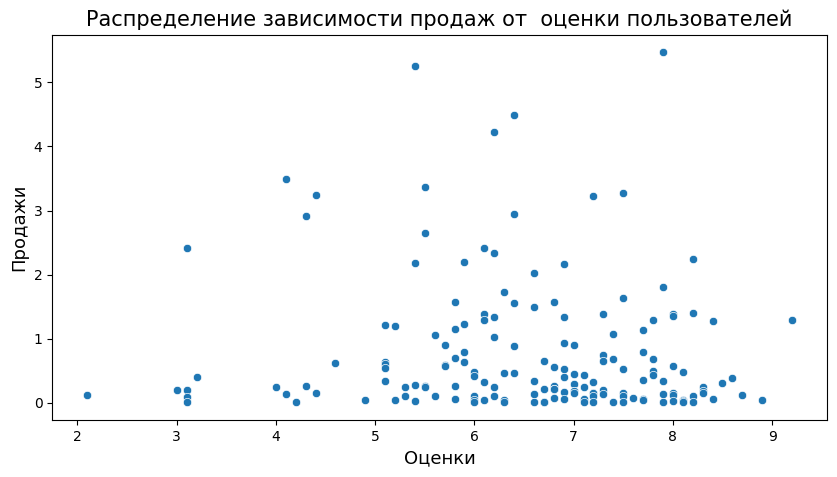

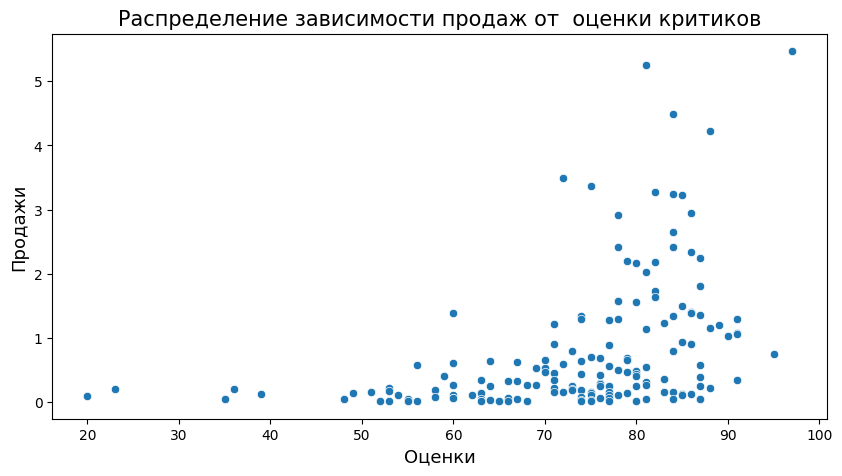

In [30]:
game_evaluation(score_XOne, 'user_score', 'оценки пользователей')

game_evaluation(score_XOne, 'critic_score', 'оценки критиков')

In [31]:
score_XOne.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.094003
critic_score,0.472462,1.000000,0.410422
total_sales,-0.094003,0.410422,1.000000


Здесь ситуация похожая. Пользовательские оценки никак не влияют на продажи игр. В то время как оценки критиков имеют небольшую власть над продажами.

Посмотрим так же как обстоят дела с пока еще аккутальной портативкой 3DS.

In [32]:
score_3DS = df_2012[df_2012['platform'] == "3DS"]
score_3DS = score_3DS[score_3DS['user_score'].isnull() == False] 
score_3DS = score_3DS[score_3DS['critic_score'].isnull() == False]
score_3DS = score_3DS[['user_score', 'critic_score', 'total_sales']]

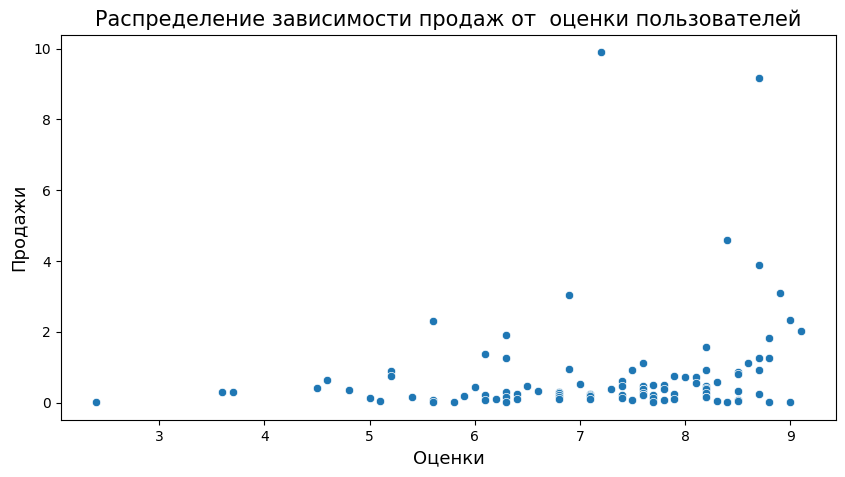

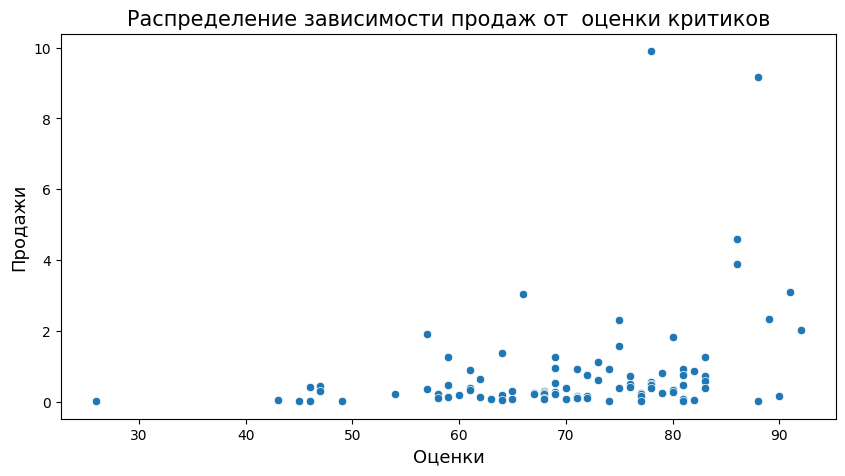

In [33]:
game_evaluation(score_3DS, 'user_score', 'оценки пользователей')

game_evaluation(score_3DS, 'critic_score', 'оценки критиков')

In [34]:
score_3DS.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.722762,0.201813
critic_score,0.722762,1.000000,0.310553
total_sales,0.201813,0.310553,1.000000


Для Японской портативки справедливо утверждение, что оценки, как пользователей так и критиков, имеют небольшой вес. В отличии от Американского и Европейского рынков, где оценки пользователей никак не влияли на покупки.

Посмотрим влияние оценки на покупки игр на ПК.

In [35]:
score_PC = df_2012[df_2012['platform'] == "PC"]
score_PC = score_PC[score_PC['user_score'].isnull() == False] 
score_PC = score_PC[score_PC['critic_score'].isnull() == False]
score_PC = score_PC[['user_score', 'critic_score', 'total_sales']]

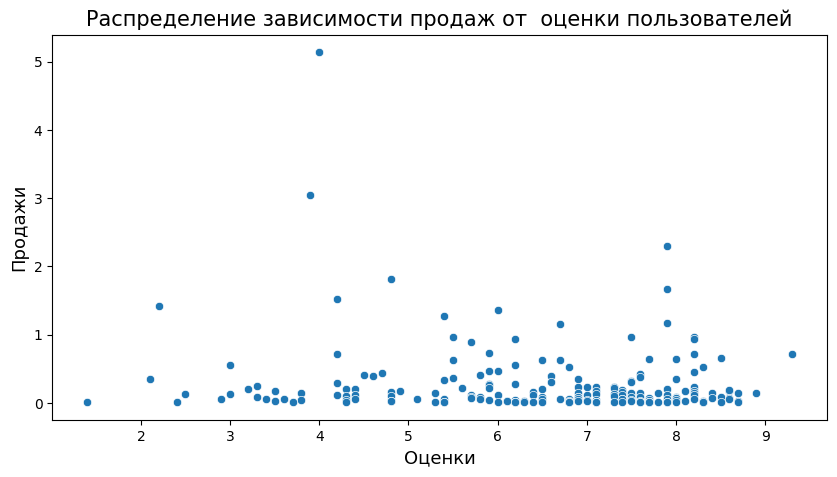

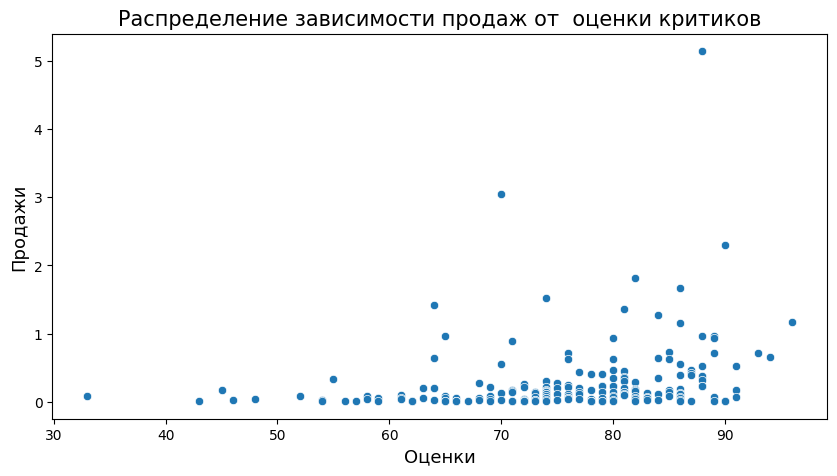

In [36]:
game_evaluation(score_PC, 'user_score', 'оценки пользователей')

game_evaluation(score_PC, 'critic_score', 'оценки критиков')

In [37]:
score_PC.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.432587,-0.136934
critic_score,0.432587,1.000000,0.236008
total_sales,-0.136934,0.236008,1.000000


Пользовательские оценки и оценки критиков имеют минимальное влияние на продажи. Но Всё же влияние есть.

Посмотрите на общее распределение игр по жанрам. 

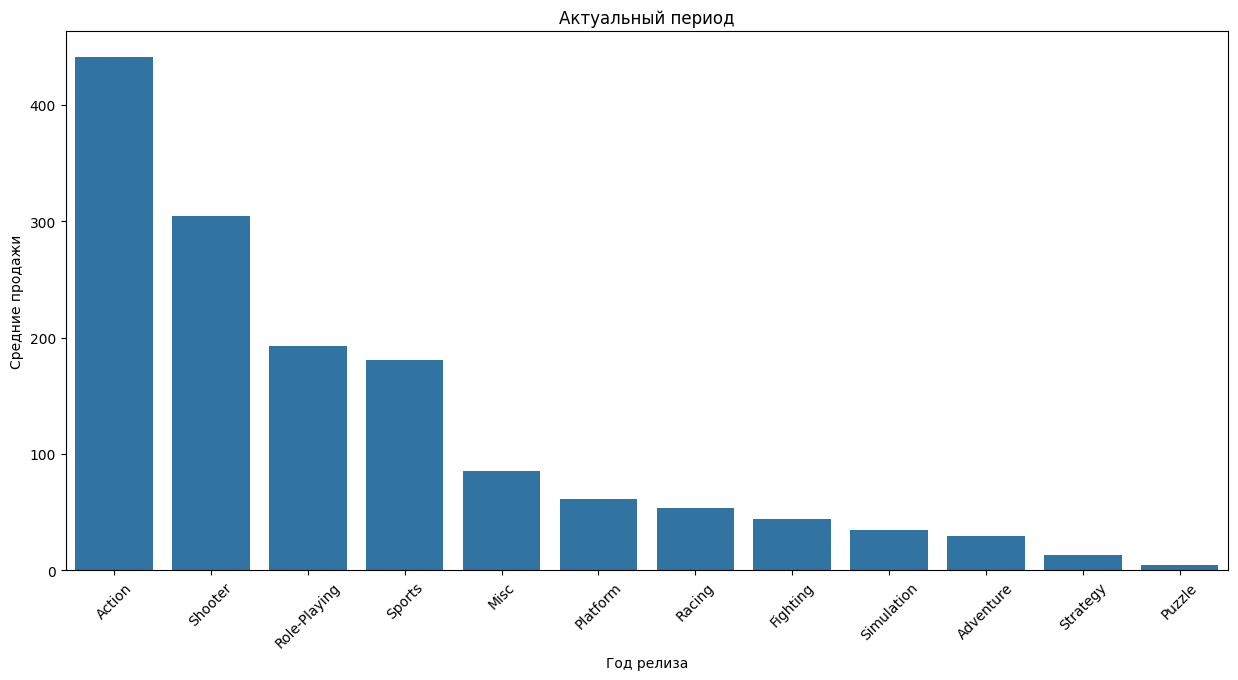

In [38]:
genre_distribution = df_2012.groupby('genre', as_index=False)\
    .agg({'total_sales':'sum'}).sort_values('total_sales', ascending=False)

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(ax=ax, x = 'genre', y = "total_sales", data = genre_distribution)
plt.xlabel('Год релиза')
plt.ylabel('Средние продажи')
plt.title('Актуальный период')
plt.xticks(rotation=45);

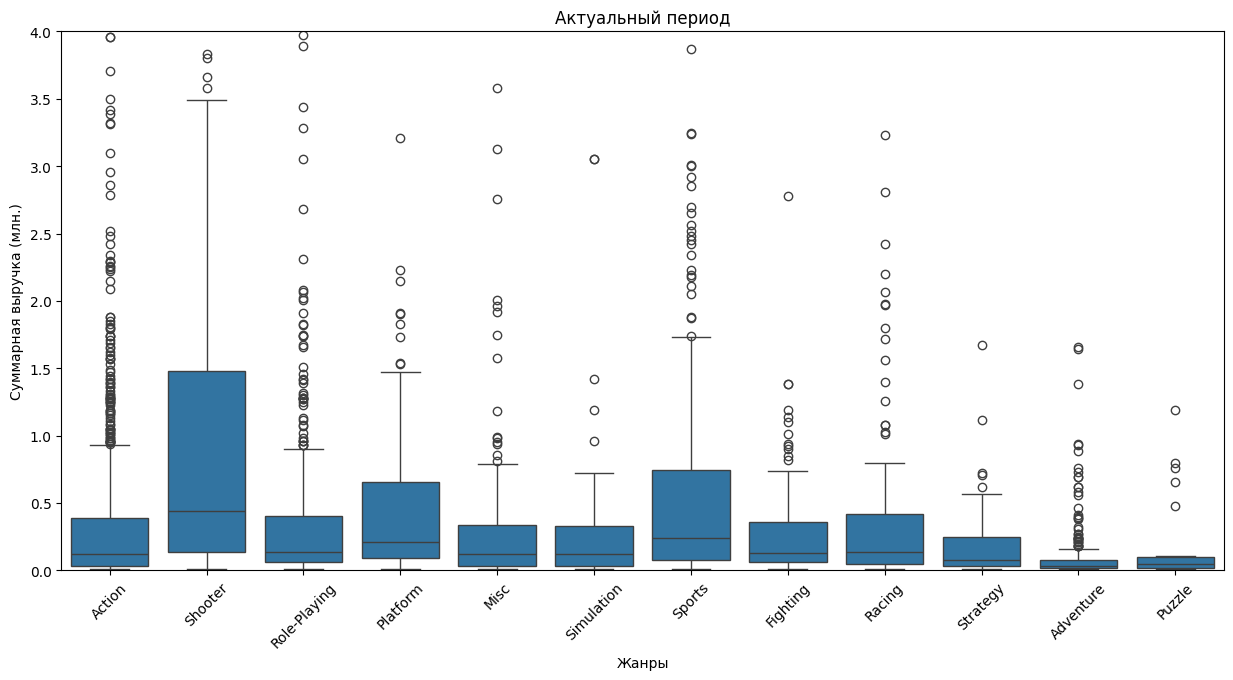

In [39]:
plt.figure(figsize=(15,7))
sns.boxplot(x='genre', y='total_sales', data=df_2012)
plt.xlabel('Жанры')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 4])
plt.xticks(rotation=45);

Заметим, что жанр Action самый продаваемый, но при этом жанр Shooter лидирует по средним продажам в сравнении с остальными жанрами, что нельзя сказать про Action. Так же заметим, что интеллектуальные игры, такие как пазлы и стратегии, не пользуются большой популярностью. Что средние продажи, что общие продажи находятся в самом низу.

**Вывод**

Наиболее типичное распределение продаж игр продолжается с 2012 года, поэтому мы рассматривали именно этот период. Релизы до 2012 года мы отмели и актуальными считали данные, начиная с 2012 года.

В абсолютном показателе больше всего копий игр в 2015 году продали на платформах PS4 и XBox One. Так же эти платформы показывают стабильный рост с 2013 года, года первого анонса игр для каждой из платформ. Спад в статистике объясняется неполными данными за текущий 2016 год. Исходя из исследовательского анализа, передовые игровые платформы выходят на пик продаж на 4-5й год существования. PS4 и XBox One считаем потенциально прибыльными и перспективными как минимум на ближайшие 2 года.

Связь между оценками и продажами существует только для оценок критиков. Наблюдается прямая зависимость: чем выше оценки критиков, тем выше продажи. В случае с оценками пользователей она практически отсутствует. Соотношение коэффициентов корреляции сохраняется и для всех платформ в среднем.

## Портрет пользователя каждого региона

Определим самые популярные платформы (топ-5) для каждого региона (NA, EU, JP)

In [40]:
def users_portret(group, region, xlabel, title):
    data = df_2012.groupby(group, as_index=False).agg({region:'sum'}).sort_values(by=region, ascending=False)
    data['ratio'] = data[region] / data[region].sum() * 100
    print(data.head())
    fig, ax = plt.subplots(figsize=(15,7))
    sns.barplot(ax=ax, x = group, y = data['ratio'], data = data.head())
    plt.xlabel(xlabel)
    plt.ylabel('Доля рынка')
    plt.title(title)

   platform  na_sales      ratio
9      X360    140.05  23.698326
4       PS4    108.74  18.400257
3       PS3    103.38  17.493274
10     XOne     93.12  15.757145
0       3DS     55.31   9.359189


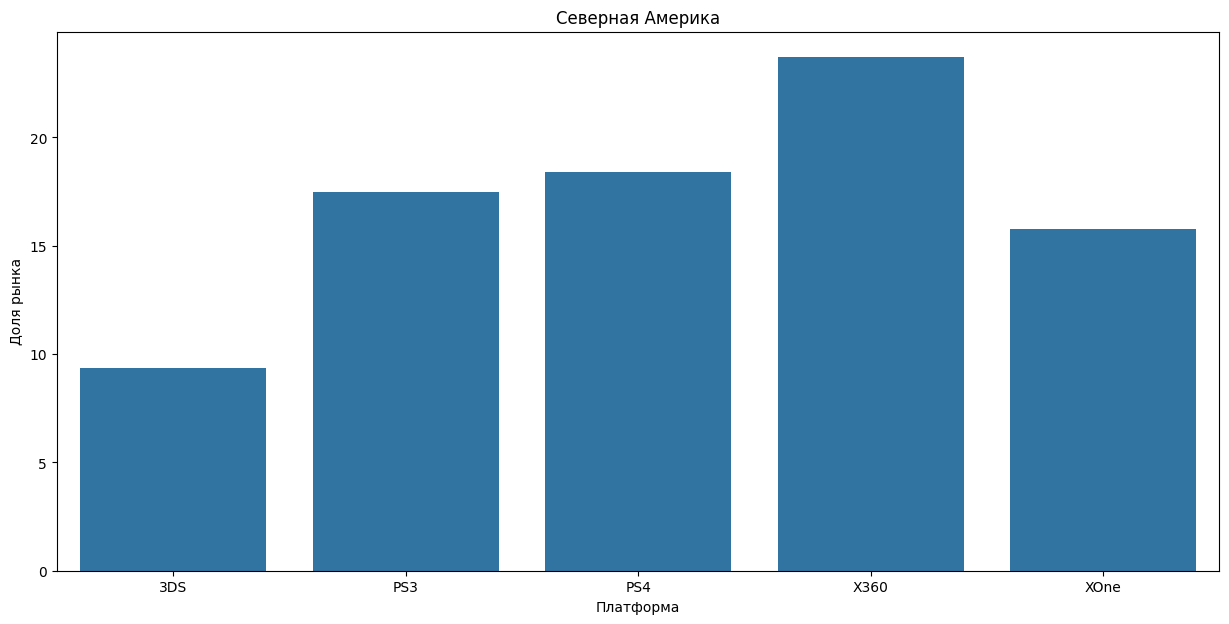

In [41]:
users_portret('platform', 'na_sales', 'Платформа', 'Северная Америка')

В Северной Америке в топе уходящее поколение от Майкрософт. Оба поколения PS и новое поколение Xbox очень близко друг к другу. И на последнем месте портативка от Нинтендо.

   platform  eu_sales      ratio
4       PS4    141.09  27.838286
3       PS3    106.86  21.084409
9      X360     74.52  14.703445
10     XOne     51.59  10.179156
0       3DS     42.64   8.413243


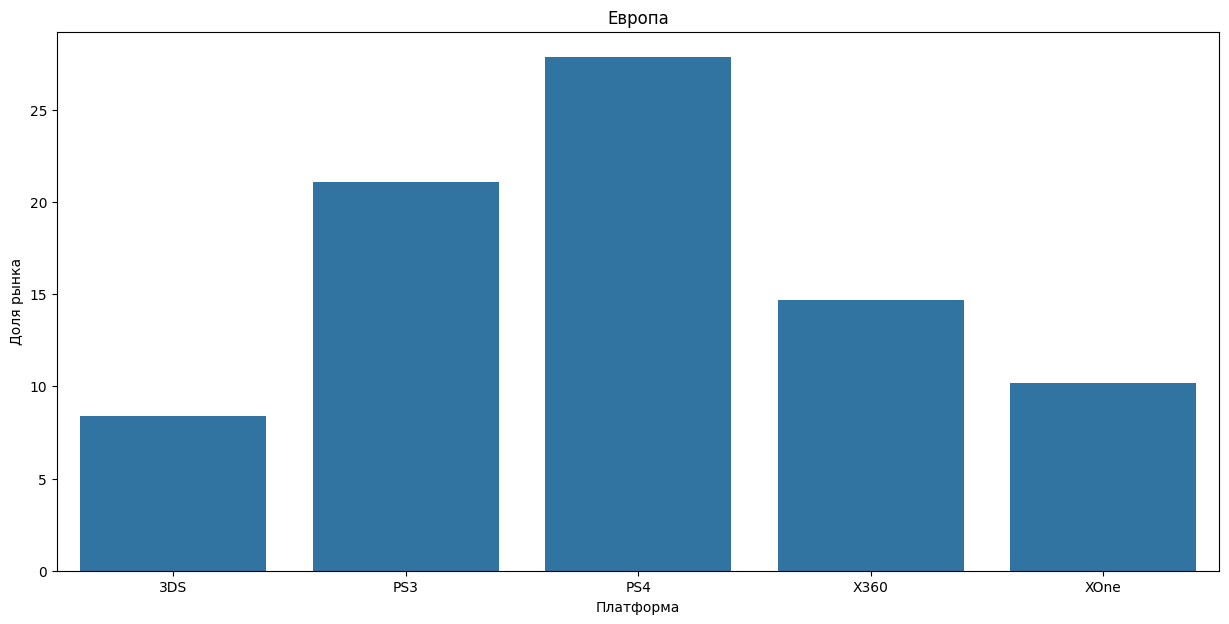

In [42]:
users_portret('platform', 'eu_sales', 'Платформа', 'Европа')

В Европе новое поколение PS уже успело обогнать предыдущее. Майкрософт со своими коробками тут явно проигрывают, Оба поколения "Коробок" даже в сумме не могут догнать PS4. С 3DS всё как и в Америке - меньше 10%.

  platform  jp_sales      ratio
0      3DS     87.79  45.586250
3      PS3     35.29  18.324852
6      PSV     21.04  10.925330
4      PS4     15.96   8.287465
8     WiiU     13.01   6.755634


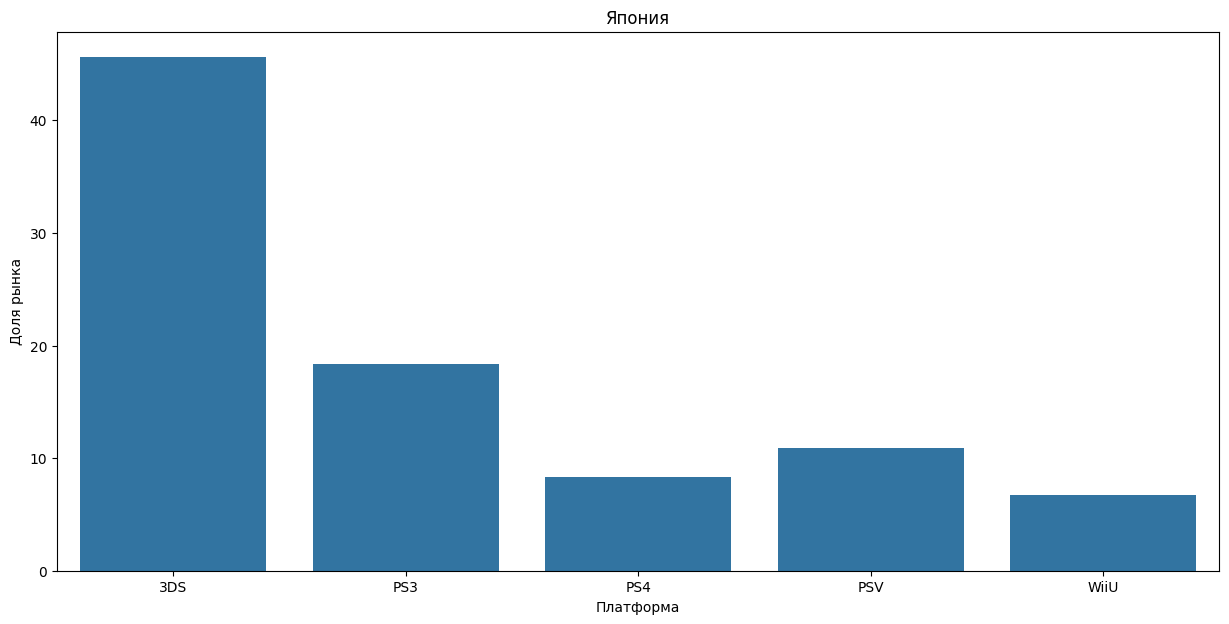

In [43]:
users_portret('platform', 'jp_sales', 'Платформа', 'Япония')

В Японии картина противоположна относительно портативок, они на 1 и 3 месте. 45% занимает 3DS. Нинтедо занимает 51% и на 3 консоли от PS приходится почти 40% топа. Все места в топе поделили между собой местные производители.

Теперь посмотрим на самые популярные жанры (топ-5).

           genre  na_sales      ratio
0         Action    177.84  30.092898
8        Shooter    144.77  24.497013
10        Sports     81.53  13.795963
7   Role-Playing     64.00  10.829653
3           Misc     38.19   6.462257


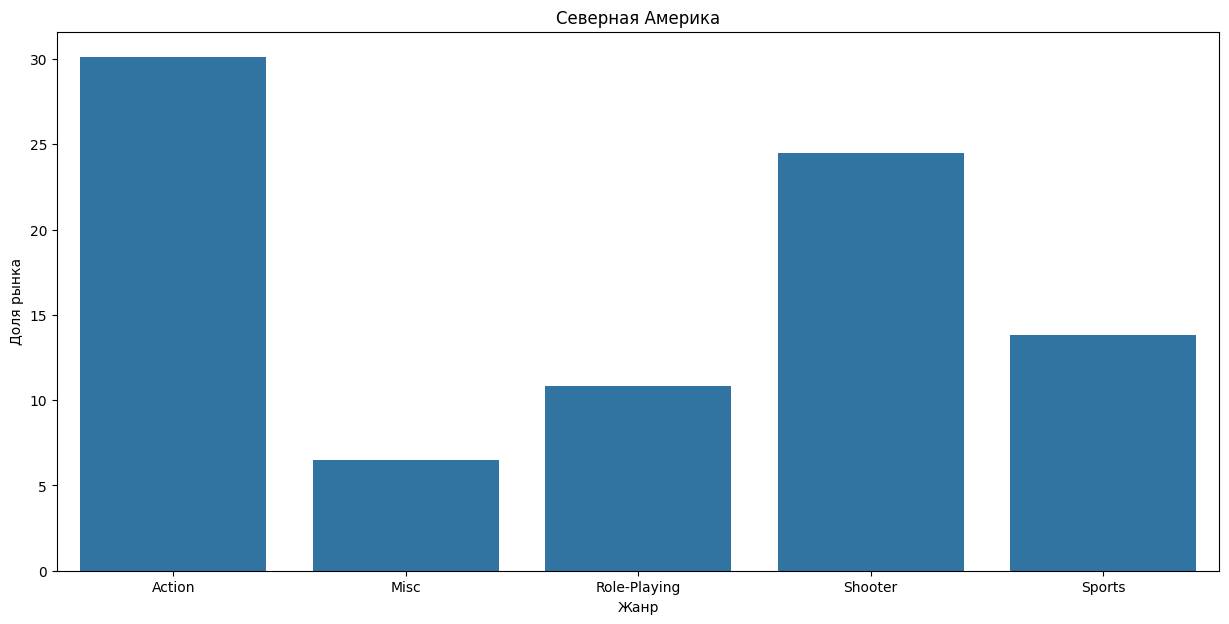

In [44]:
users_portret('genre', 'na_sales', 'Жанр', 'Северная Америка')

Для Америки более предпочтительно носиться и стрелять)) Первые места занимают: экшены, шутеры и спортивные игры.

           genre  eu_sales      ratio
0         Action    159.34  31.439170
8        Shooter    113.47  22.388619
10        Sports     69.09  13.632059
7   Role-Playing     48.53   9.575392
6         Racing     27.29   5.384555


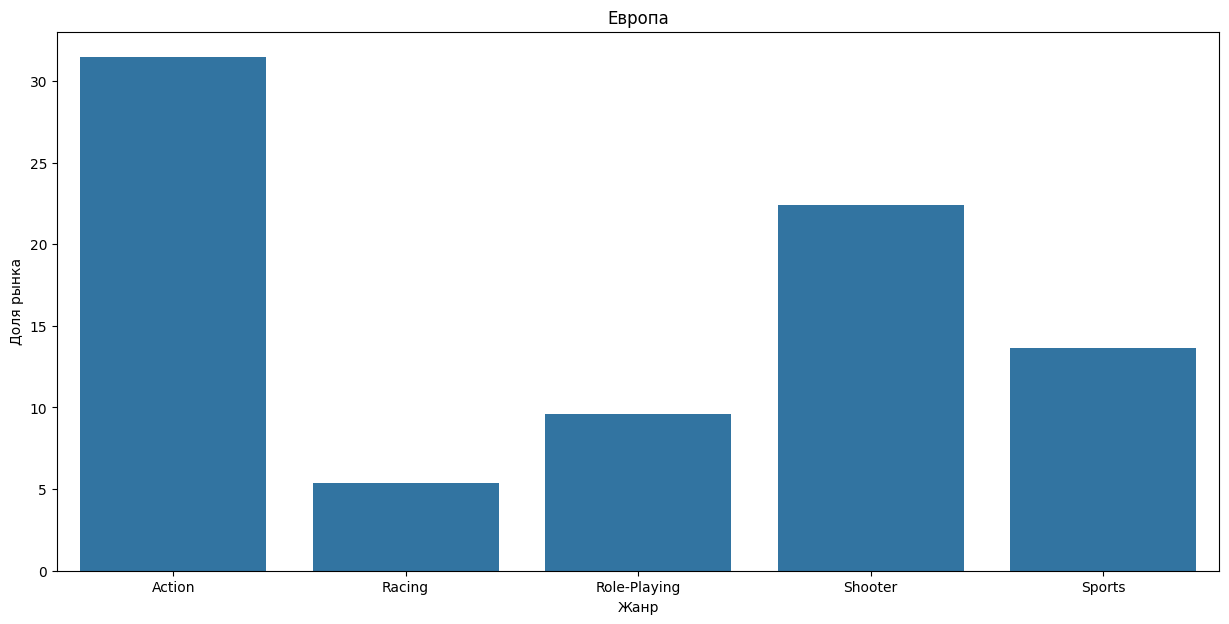

In [45]:
users_portret('genre', 'eu_sales', 'Жанр', 'Европа')

Для Европы результат похож за исключением, что первое и второе место поменялись местами. И изменилось 5-е место с misc на гонки.

          genre  jp_sales      ratio
7  Role-Playing     65.44  33.980683
0        Action     52.80  27.417177
3          Misc     12.86   6.677744
9    Simulation     10.41   5.405546
2      Fighting      9.44   4.901859


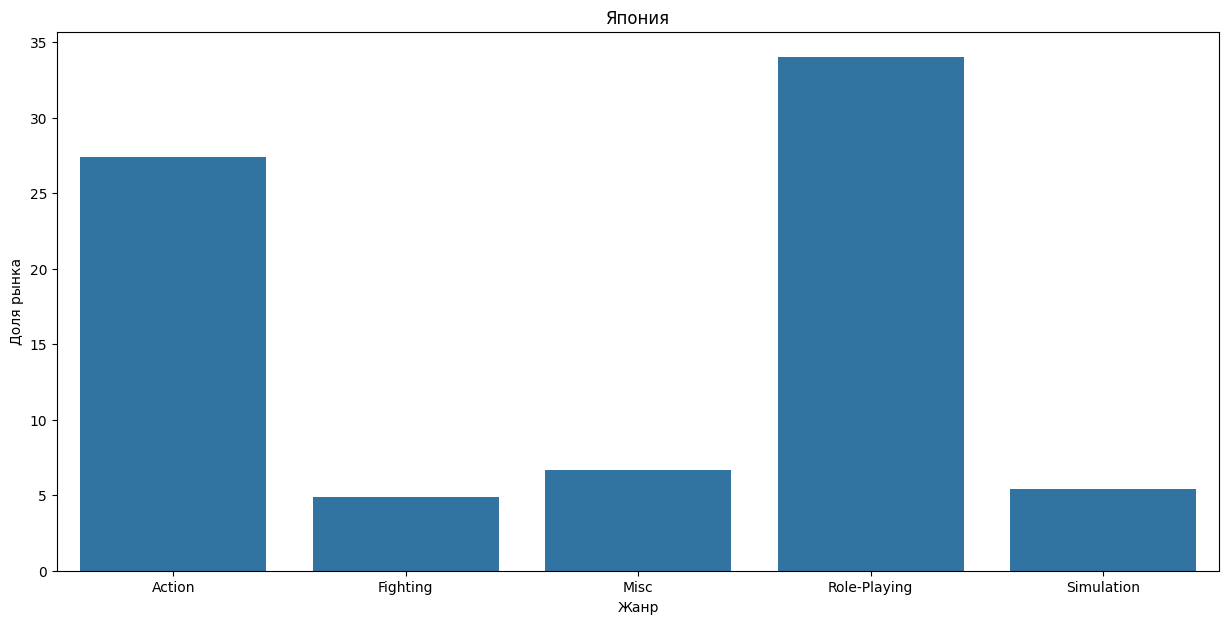

In [46]:
users_portret('genre', 'jp_sales', 'Жанр', 'Япония')

В Японии как всегда всё по своему, за исключением экшн-игр. На первом месте здесь ролёвки.

Чтобы проверить влияние рейтинга ESRB на продажи в отдельном регионе, нужно понять что это за рейтинг.

Состоит рейтинг из следующей классификации:
- E - для всех возрастов (все)
- T - для лиц от 13 лет и старше (младший подросток)
- M - от 17 лет и старше (старший подросток)
- E10+ - от 10 лет и старше (ребёнок)
- EC - для всех возрастов (все), тоже самое, что и Е
- RP - оценка ещё не присвоена
- K-A - для всех возрастов (все), тоже самое, что и Е
- AO - для лиц старше 18 лет (взрослый)

In [47]:
def sale_rating(group, region, title):
    data = df_2012.groupby(group, as_index=False).agg({region:'sum'}).sort_values(by=region, ascending=False)
    fig, ax = plt.subplots(figsize=(15,7))
    sns.barplot(ax=ax, x = group, y = region, data = data)
    plt.xlabel('Рейтинг')
    plt.ylabel('Суммарная выручка (млн)')
    plt.title(title)

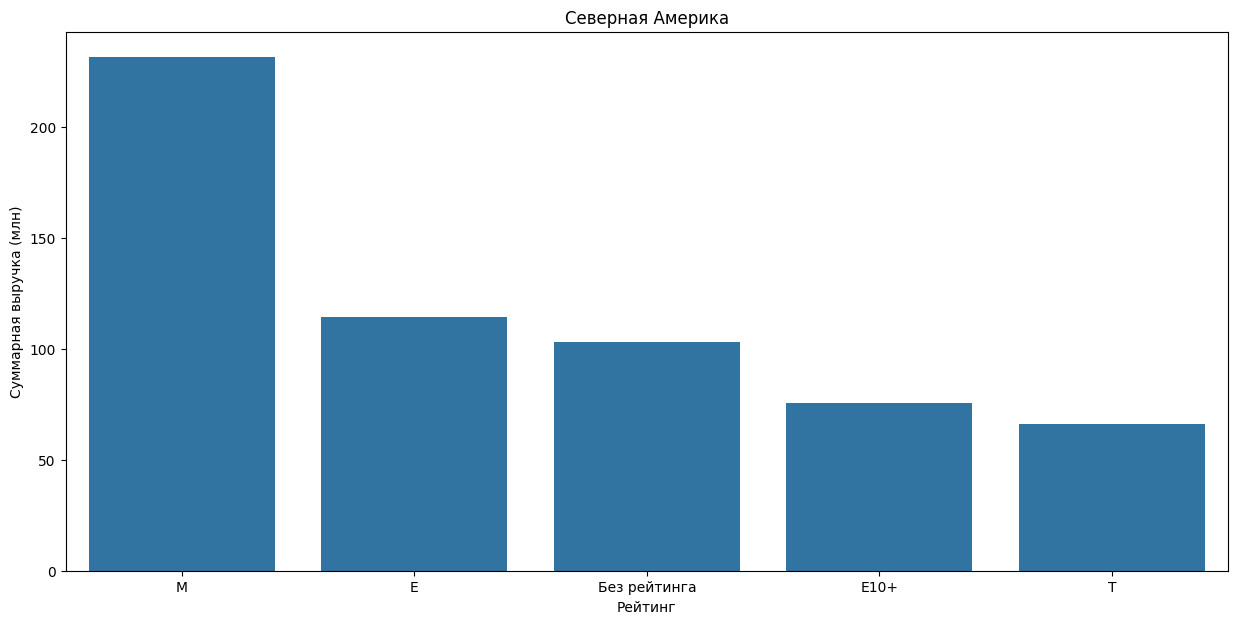

In [48]:
sale_rating('rating', 'na_sales', 'Северная Америка')

В Северной Америке лидируют игры 17+ лет, на втором месте игры для всех возрастов.

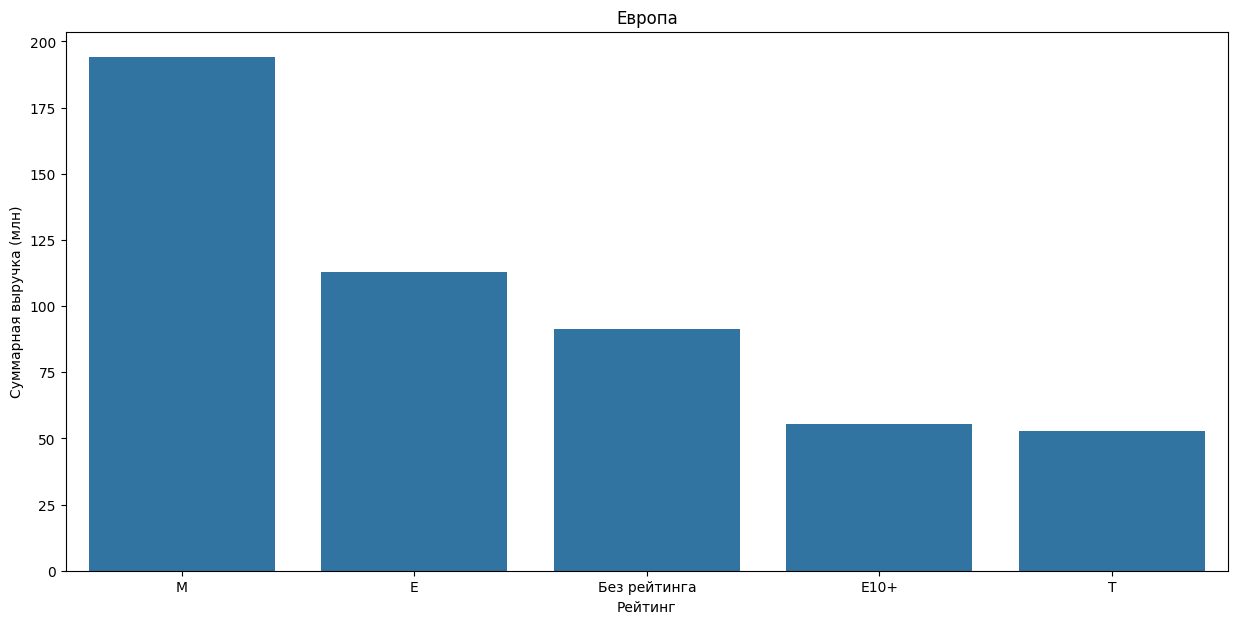

In [49]:
sale_rating('rating', 'eu_sales', 'Европа')

В Европе ситуация аналогична Америке.

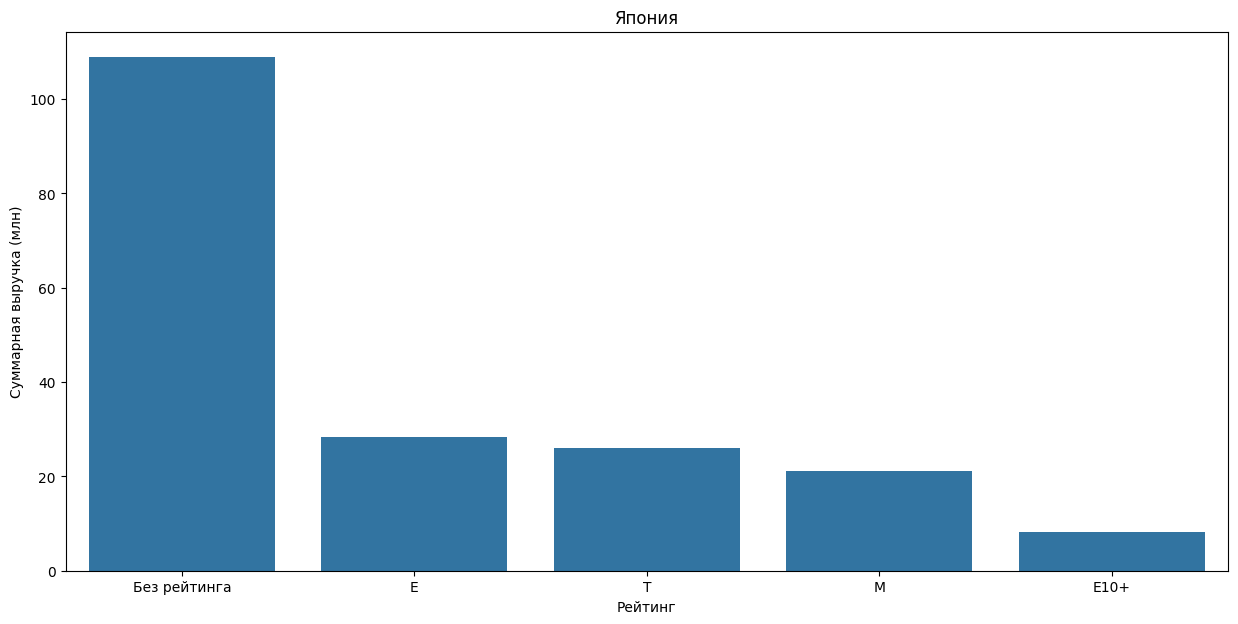

In [50]:
sale_rating('rating', 'jp_sales', 'Япония')

В Японии как всегда отличия. Лидируют игры "без рейтинга". Можно сделать вывод, что игроки данного региона больше играют в продукт предназначенный для местного рынка, которому не нужно получать рейтинг ESRB необходимый для рынка Северной Америки. Далее идет для всех возрастов и на третьем месте игры 13+.

**Вывод по портрету игрока для регионов NA, EU и JP**

Европейский и американский потребитель видеоигр очень похожи. Они предпочитают домашние консоли, одни и те же жанры игр и возрастная картина потребителей, судя по рейтингу ESRB, идентична. Единственное отличие, что в америке больше любят родной Xbox, а в Европе азиатский PlayStation.

Японцы отличаются стилем потребления (больше любят портативные консоли) и вкусами на жанр, предпочитая ролевые видеоигры. 


**Портрет игрока по регионам выглядит следующим образом:**
Северная Америка:

- Самые популярные игровые платформы в Северной Америке (топ-5): X360, PS4, PS3, XOne, 3DS
- Самые популярные жанры в Северной Америке (топ - 5 по убыванию): Action, Shooter, Sports, Role-Playing, Misc
- Самый предпочитаемый рейтинг в Северной Америке по убыванию: игры от 17 лет, игры для всех, от 10 лет, игры от 13 лет.

Европа:

- Самые популярные игровые платформы Европе (топ-5): PS4, PS3, X360, XOne, 3DS
- Самые популярные жанры в Европе (топ - 5 по убыванию): Action, Shooter, Sports, Role-Playing, Racing
- Самый предпочитаемый рейтинг в Европе по убыванию: игры от 17 лет, игры для всех, от 10 лет, игры от 13 лет.

Япония:

- Самые популярные игровые платформы в Японии - японские платформы (топ-5): 3DS, PS3, PSV, PS4, WiiU
- Самые популярные жанры в Японии (топ - 5 по убыванию): Role-Playing, Action, Misc, Simulation, Fighting
- Самый предпочитаемый рейтинг в Японии по убыванию: "без рейтинга", игры для всех, игры от 13 лет, игры от 17 лет, игры от 10 лет.

## Проверка гипотез

**Сформулируем нашу гипотезу**

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [51]:
user_score_xone = df_2012.query('platform == "XOne" and user_score > 0')
user_score_pc = df_2012.query('platform == "PC" and user_score > 0')

In [52]:
results = st.ttest_ind(user_score_pc['user_score'], user_score_xone['user_score'], equal_var=False)

alpha = .05 

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу 


Гипотеза 1 не подтвердилась: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Сформулируем нашу гипотезу**

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [53]:
user_score_action = df_2012.query('genre == "Action" and user_score > 0')
user_score_sport = df_2012.query('genre == "Sports" and user_score > 0')

In [54]:
results = st.ttest_ind(user_score_sport['user_score'], user_score_action['user_score'], equal_var=False)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

4.24307776572644e-20
Отвергаем нулевую гипотезу 


Отвергнув нулевую гипотезу, мы подтвердили гипотезу 2: средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

**В ходе выполнения работы мы:**

- на первом шаге исследования импортировали библиотеки и файлы, ознакомились с данными;
- затем привели "шапку" к нижнему регистру, обработали пропуски, поменяли типы данных в столбцах, нашли суммарные продажи;
- провели исследовательский анализ, построили распределение продаж копий игр по годам, платформам и жанрам, определили актуальный период для построения прогноза, выбрали наиболее перспективные платформы и жанры, оценили степень влияния оценок критиков и пользователей на показатель продаж;
- составили портрет пользователей в каждом регионе;
- проверили гипотезы.

**Интересные выводы:**

- В среднем поколение платформ живёт около 8-10 лет
- количество продаваемых в год копий игр ощутимо увеличилось в 2002 году. Релизы до 2012 года мы отмели и актуальными считали данные, начиная с 2012 года
- в абсолютном показателе больше всего копий игр в 2015 году продали на платформах PS4 и XBox One. Так же эти платформы показывают стабильный рост с 2013 года, года первого анонса игр для каждой из платформ. Спад в статистике объясняется неполными данными за текущий 2016 год. Исходя из исследовательского анализа, передовые игровые платформы выходят на пик продаж на 4-5й год существования. PS4 и XBox One считаем потенциально прибыльными и перспективными как минимум на ближайшие 2 года
- связь между оценками и продажами существует только для оценок критиков. Наблюдается прямая зависимость: чем выше оценки критиков, тем выше продажи. В случае с оценками пользователей она практически отсутствует. Соотношение коэффициентов корреляции сохраняется и для всех платформ в среднем
- Европейский и американский потребитель видеоигр очень похожи. Они предпочитают домашние консоли, одни и те же жанры игр и возрастная картина потребителей, судя по рейтингу ESRB, идентична. Единственное отличие, что в америке больше любят родной XBox, а в Европе азиатский PlayStation
- Людям неинтересны интеллектуальные игры, большинство людей предпочитает или экшн, или шутер
- Японцы отличаются стилем потребления (больше любят портативные консоли) и вкусами на жанр, предпочитая ролевые видеоигры. Так же японцам всё равно на наличие рейтинга ESRB.

**Рекомендации на потенциально популярный продукт для планирования рекламных кампаний.**

- Основную долю закупки провести для таких приставок как Sony PlayStation 4, небольшую часть на Xbox One. 
- Среди жанров сделать акцент на Action и Shooter и выбирать игры с рейтингом от 17 и старше. 
- Увеличить продажи по остаткам игр на портативные приставки, т.к. в скором времени они уйдут с мирового рынка и останутся популярны только в Японии.